In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

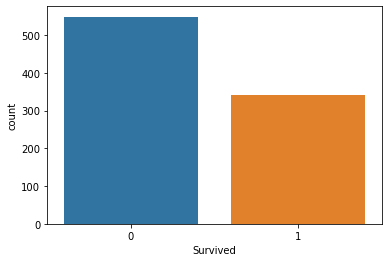

In [7]:
sns.countplot(x='Survived',data=df)

In [8]:
df['Survived'].value_counts()
#342 people survived

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

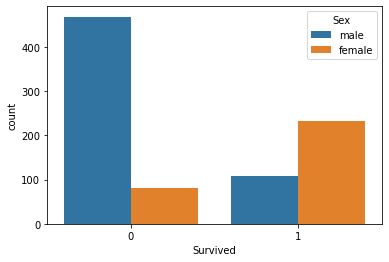

In [9]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [10]:
#df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mode().sort_values(by='Survived', ascending=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

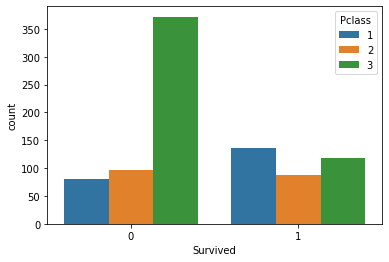

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

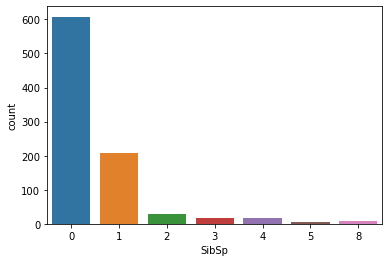

In [12]:
sns.countplot(x="SibSp",data=df)

## Data Wrangling

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

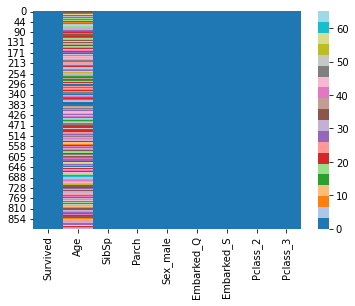

In [47]:
sns.heatmap(df,cmap="tab20")

<AxesSubplot:xlabel='Parch', ylabel='Age'>

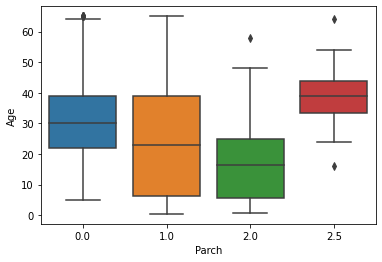

In [86]:
sns.boxplot(x='Parch',y='Age',data=df)

In [16]:
df.drop("Cabin",axis=1,inplace=True)

In [17]:
#Approach1:Dropping missing values
df.dropna(inplace=True)

<AxesSubplot:>

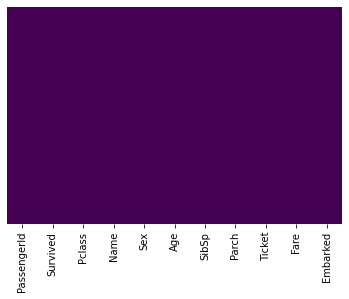

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df['Age']=df['Age'].replace(to_replace=0, value=np.nan)
df['Age']=df['Age'].astype(float)
mean=df['Age'].mean()
df['Age'].replace(np.nan,mean,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [21]:
df=df.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [23]:
dummies=pd.get_dummies(df[['Sex','Embarked','Pclass']],columns=['Sex','Embarked','Pclass'],drop_first=True)

In [24]:
df=pd.concat([df,dummies],axis=1)

In [25]:
columns=['Sex','Embarked','Pclass']

In [26]:
df.drop(columns,axis=1,inplace=True)

In [27]:
df.head()

,Survived,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [29]:
lowage,uppage=remove_outlier(df['Age'])
df["Age"]=np.where(df['Age']>uppage,uppage,df['Age'])
df["Age"]=np.where(df['Age']<lowage,lowage,df['Age'])

In [30]:
lowage,uppage=remove_outlier(df['SibSp'])
df["SibSp"]=np.where(df['SibSp']>uppage,uppage,df['SibSp'])
df["SibSp"]=np.where(df['SibSp']<lowage,lowage,df['SibSp'])

In [31]:
lowage,uppage=remove_outlier(df['Parch'])
df["Parch"]=np.where(df['Parch']>uppage,uppage,df['Parch'])
df["Parch"]=np.where(df['Parch']<lowage,lowage,df['Parch'])

In [34]:
lowage,uppage=remove_outlier(df['Parch'])
df["Pclass_2"]=np.where(df['Pclass_2']>uppage,uppage,df['Pclass_2'])
df["Pclass_2"]=np.where(df['Pclass_2']<lowage,lowage,df['Pclass_2'])

<AxesSubplot:xlabel='Parch', ylabel='Age'>

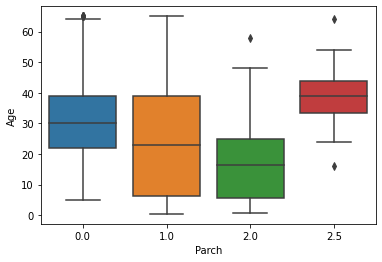

In [85]:
sns.boxplot(x='Parch',y='Age',data=df)

In [49]:
x=df.drop(['Survived'],axis=1)
y=df[['Survived']]

In [51]:
reg=LogisticRegression()

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65,test_size=0.35,random_state=1)

In [81]:
reg.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
reg.score(x_train,y_train)

0.7987012987012987

In [83]:
reg.score(x_test,y_test)

0.804

In [87]:
df['Age']=df['Age'].replace(to_replace=0, value=np.nan)
df['Age']=df['Age'].astype(float)
median=df['Age'].median()
df['Age'].replace(np.nan,median,inplace=True)

In [88]:
df.sample()

,Survived,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
224,1,38.0,1.0,0.0,1,0,1,0.0,0


In [89]:
reg.score(x_train,y_train)

0.7987012987012987

In [90]:
reg.score(x_test,y_test)

0.804